# Predicting Traffic Incident Severity Based on Weather and Time Factors

## 1.0 Description

The goal of this project is to develop a predictive model that can estimate the severity of traffic incidents based on various factors such as weather conditions (rain, snow, fog, etc.) and time-related elements (time of day, day of the week, and holidays). The model will utilize historical traffic incident data, weather patterns, and temporal factors to predict the likelihood of incidents leading to severe outcomes, such as injuries or fatalities, rather than minor disruptions. This will help transportation authorities, emergency services, and city planners make data-driven decisions, optimize response strategies, and improve public safety.

## 1.1 Business Understanding

Traffic incidents contribute significantly to congestion, injuries, fatalities, and economic losses. Understanding the factors that influence the severity of these incidents can help reduce the overall impact on society. By leveraging data science to predict the severity of traffic incidents based on weather and time related variables, transportation agencies can:

- ```Improve Safety```: Predicting severe incidents allows for timely interventions, such as dispatching emergency services more effectively.


- ```Optimize Resource Allocation```: Traffic management and emergency responders can allocate resources in advance based on predicted severity, ensuring quicker response times in critical situations.

- ```Enhance Traffic Management```: Better understanding of incident severity can guide traffic signal optimization, road closures, and detour planning to minimize disruptions.

- ```Promote Public Awareness```: Through predictive insights, authorities can inform drivers about weather-related risks and encourage safer driving practices during high-risk periods.

This project aims to create a solution that not only reduces the severity of traffic incidents but also improves overall traffic flow and safety.



## 1.2 Objectives

1. Data collection:  The data was sourced from https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx/about_data

2. Data cleaning

3. Exploratory Data analysis

4. Feature Engineering

5. Model development

6. Model evaluation

7. Model deployment

## 1.3 Shareholders

- ```Transportation Authorities```: Local and regional traffic management departments who would benefit from predictive tools to optimize response times and reduce traffic disruptions.

- ```Emergency Services```: Police, fire departments, and medical teams who could use severity predictions to prepare resources and prioritize high-risk incidents.
- ```City Planners and Government Agencies```: Municipal decision makers focused on infrastructure planning and public safety initiatives could use these insights to improve roadways and safety measures.

- ```Public and Drivers```: The general public will benefit indirectly through increased safety, fewer severe accidents, and enhanced traffic management.

- ```Insurance Companies```: Insurers could use severity predictions to optimize their pricing models, assess risk in real-time, and process claims more efficiently.
- ```Weather Services```: Weather data providers may collaborate for deeper insights and provide better real-time forecasts for integrating into the system.

- ```Technology Providers```: Companies providing machine learning infrastructure, cloud services, and data collection tools will play a role in the development and deployment of the model.

## 2.0 Necessary libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbaPipeline

# Suppress all warnings
warnings.filterwarnings('ignore')


In [3]:
data_path = '..\Data\Traffic_Crashes_Resulting_in_Injury_20250305.csv'
Crashes = pd.read_csv(data_path)
Crashes.head()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,82049,20208000.0,8087000.0,230041955,37.734019,-122.388046,SFPD-INTERIM DB,CITY STREET,01/18/2023 05:53:00 PM,2023 January 18,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Bayview Hunters Point,10.0,BAYVIEW,2.0,9.0,1.0,86.0,86.0
1,82166,25723000.0,805000.0,230111655,37.762886,-122.428578,SFPD-INTERIM DB,CITY STREET,02/15/2023 09:30:00 AM,2023 February 15,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Castro/Upper Market,8.0,MISSION,3.0,5.0,5.0,37.0,37.0
2,41951,32862000.0,7826101.0,3491922,37.768636,-122.454858,SFPD-CROSSROADS,CITY STREET,11/11/2007 03:50:00 PM,2007 November 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Golden Gate Park,5.0,PARK,7.0,11.0,12.0,9.0,9.0
3,48546,23904000.0,NaN,190523857,37.780363,-122.399080,SFPD-INTERIM DB,CITY STREET,07/19/2019 01:50:00 PM,2019 July 19,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,South of Market,6.0,SOUTHERN,1.0,10.0,34.0,32.0,32.0
4,35692,26705000.0,NaN,170390767,37.804146,-122.425110,SFPD-CROSSROADS,CITY STREET,05/11/2017 07:53:00 AM,2017 May 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Russian Hill,2.0,CENTRAL,6.0,6.0,32.0,98.0,98.0


In [4]:
Crashes.shape

(61229, 63)

The data set has 61229 rows and 63 columns

In [5]:
Crashes.columns

Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       'data_

In [6]:
Crashes.describe()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,tb_latitude,tb_longitude,accident_year,distance,number_killed,number_injured,party_at_fault,supervisor_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
count,61229.000000,6.120700e+04,2.733600e+04,61062.000000,61062.000000,61229.000000,61150.000000,61226.00000,61229.000000,55163.000000,60988.000000,60994.000000,61015.000000,60998.000000,59961.000000,59961.000000
mean,35511.366183,2.585379e+07,6.975567e+06,37.765794,-122.428668,2014.421973,55.961292,0.00980,1.252903,1.013270,6.074342,5.139833,6.688732,20.635300,53.409516,53.409516
std,24558.926014,4.916555e+06,4.068037e+06,0.024442,0.028345,5.705362,263.824017,0.10161,0.699803,0.124737,2.913055,2.980160,3.365241,12.379127,32.756729,32.756729
min,1.000000,2.000600e+07,1.000000e+05,37.707459,-122.513616,2005.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15991.000000,2.385600e+07,3.454000e+06,37.748896,-122.442840,2010.000000,0.000000,0.00000,1.000000,1.000000,4.000000,3.000000,3.000000,9.000000,27.000000,27.000000
50%,31878.000000,2.493400e+07,7.301000e+06,37.772526,-122.421464,2014.000000,0.000000,0.00000,1.000000,1.000000,6.000000,4.000000,7.000000,20.000000,46.000000,46.000000
75%,48413.000000,2.669600e+07,1.015675e+07,37.783824,-122.408359,2019.000000,51.000000,0.00000,1.000000,1.000000,9.000000,8.000000,10.000000,34.000000,86.000000,86.000000
max,89186.000000,5.436600e+07,1.999910e+07,37.829991,-122.358328,2024.000000,26400.000000,4.00000,19.000000,5.000000,11.000000,10.000000,11.000000,41.000000,117.000000,117.000000


In [7]:
Crashes['collision_severity'].nunique

<bound method IndexOpsMixin.nunique of 0        Injury (Complaint of Pain)
1        Injury (Complaint of Pain)
2            Injury (Other Visible)
3        Injury (Complaint of Pain)
4        Injury (Complaint of Pain)
                    ...            
61224        Injury (Other Visible)
61225        Injury (Other Visible)
61226    Injury (Complaint of Pain)
61227    Injury (Complaint of Pain)
61228        Injury (Other Visible)
Name: collision_severity, Length: 61229, dtype: object>

In [8]:
Crashes_selected = Crashes[['tb_latitude','tb_longitude','collision_date', 'collision_time','accident_year','month','day_of_week','primary_rd','secondary_rd','distance','direction','weather_1','collision_severity','type_of_collision','mviw','ped_action','road_surface','road_cond_1','lighting','dph_col_grp_description','control_device','number_killed','number_injured','party_at_fault','party1_type', 'party1_dir_of_travel','party1_move_pre_acc','party2_type','party2_dir_of_travel','party2_move_pre_acc']]
Crashes_selected.head()

,tb_latitude,tb_longitude,collision_date,collision_time,accident_year,month,day_of_week,primary_rd,secondary_rd,distance,...,control_device,number_killed,number_injured,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc
0,37.734019,-122.388046,2023 January 18,17:53:00,2023,January,Wednesday,LANE ST,NEWCOMB AVE,68.0,...,None,0.0,1,NaN,Driver,West,Proceeding Straight,NaN,NaN,NaN
1,37.762886,-122.428578,2023 February 15,09:30:00,2023,February,Wednesday,17TH ST,CHURCH ST,20.0,...,None,0.0,1,NaN,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN
2,37.768636,-122.454858,2007 November 11,15:50:00,2007,November,Sunday,KEZAR DR,WALLER ST,210.0,...,None,0.0,2,NaN,Driver,North,Proceeding Straight,NaN,NaN,NaN
3,37.780363,-122.399080,2019 July 19,13:50:00,2019,July,Friday,PERRY ST,04TH ST,0.0,...,Functioning,0.0,1,NaN,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn
4,37.804146,-122.425110,2017 May 11,07:53:00,2017,May,Thursday,BAY ST,VAN NESS AVE,0.0,...,Not Stated,0.0,1,NaN,Driver,North,Not Stated,Pedestrian,West,Not Stated


In [9]:
Crashes_selected.isna().sum()

tb_latitude                 167
tb_longitude                167
collision_date                0
collision_time               60
accident_year                 0
month                         0
day_of_week                   9
primary_rd                    0
secondary_rd                142
distance                     79
direction                     1
weather_1                     0
collision_severity            0
type_of_collision             0
mviw                          0
ped_action                    0
road_surface                  0
road_cond_1                   0
lighting                      0
dph_col_grp_description       1
control_device                0
number_killed                 3
number_injured                0
party_at_fault             6066
party1_type                  11
party1_dir_of_travel         11
party1_move_pre_acc          10
party2_type                4386
party2_dir_of_travel       4384
party2_move_pre_acc        4383
dtype: int64

In [10]:
Crashes_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61229 entries, 0 to 61228
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tb_latitude              61062 non-null  float64
 1   tb_longitude             61062 non-null  float64
 2   collision_date           61229 non-null  object 
 3   collision_time           61169 non-null  object 
 4   accident_year            61229 non-null  int64  
 5   month                    61229 non-null  object 
 6   day_of_week              61220 non-null  object 
 7   primary_rd               61229 non-null  object 
 8   secondary_rd             61087 non-null  object 
 9   distance                 61150 non-null  float64
 10  direction                61228 non-null  object 
 11  weather_1                61229 non-null  object 
 12  collision_severity       61229 non-null  object 
 13  type_of_collision        61229 non-null  object 
 14  mviw                  

In [11]:

from sklearn.impute import SimpleImputer


numeric_cols = ['party_at_fault', 'distance', 'number_killed']
imputer = SimpleImputer(strategy='median')  # use median
Crashes_selected[numeric_cols] = imputer.fit_transform(Crashes_selected[numeric_cols])

# Impute categorical columns with 'Unknown' or 'Most Frequent'
categorical_cols = ['party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc']
Crashes_selected[categorical_cols] = Crashes_selected[categorical_cols].fillna('Unknown')

# For small missing data, impute with mode
Crashes_selected['day_of_week'] = Crashes_selected['day_of_week'].fillna(Crashes_selected['day_of_week'].mode()[0])

# Drop rows with small missing data
Crashes_selected= Crashes_selected.dropna(subset=['secondary_rd','tb_latitude', 'tb_longitude','collision_date', 'collision_time', 'party1_type', 'party1_dir_of_travel','party1_move_pre_acc','dph_col_grp_description','direction'])



In [12]:
Crashes_selected.isna().sum()

tb_latitude                0
tb_longitude               0
collision_date             0
collision_time             0
accident_year              0
month                      0
day_of_week                0
primary_rd                 0
secondary_rd               0
distance                   0
direction                  0
weather_1                  0
collision_severity         0
type_of_collision          0
mviw                       0
ped_action                 0
road_surface               0
road_cond_1                0
lighting                   0
dph_col_grp_description    0
control_device             0
number_killed              0
number_injured             0
party_at_fault             0
party1_type                0
party1_dir_of_travel       0
party1_move_pre_acc        0
party2_type                0
party2_dir_of_travel       0
party2_move_pre_acc        0
dtype: int64

### Checking for Outliers

In [13]:
outliers_multiple_columns = pd.DataFrame()


exclude_columns = ['number_injured', 'number_killed']

for col in Crashes_selected.select_dtypes(include=['float64', 'int64']).columns:
    
    if col not in exclude_columns:
        Q1 = Crashes_selected[col].quantile(0.25)
        Q3 = Crashes_selected[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = Crashes_selected[(Crashes_selected[col] < lower_bound) | (Crashes_selected[col] > upper_bound)]
        outliers_multiple_columns[col] = outliers[col]

# Calculate the sum of outliers for each column (excluding 'number_injured' and 'number_killed')
outliers_multiple_columns.sum()


tb_latitude            0.000000
tb_longitude     -214378.190337
accident_year          0.000000
distance          211870.000000
party_at_fault        20.000000
dtype: float64

### Caping outliers

In [14]:
for col in outliers_multiple_columns.columns:
    Q1 = Crashes_selected[col].quantile(0.25)
    Q3 = Crashes_selected[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers to the upper and lower bounds
    Crashes_selected[col] = np.where(Crashes_selected[col] < lower_bound, lower_bound, Crashes_selected[col])
    Crashes_selected[col] = np.where(Crashes_selected[col] > upper_bound, upper_bound, Crashes_selected[col])


- For the first line, it checks if each value in Crashes_selected[col] is less than the lower_bound. If true, it replaces the value with the lower_bound; otherwise, it keeps the original value.

- For the second line, it checks if each value in Crashes_selected[col] is greater than the upper_bound. If true, it replaces the value with the upper_bound; otherwise, it keeps the original value.

###  Convert all column names to lowercase

In [15]:
# Convert all column names to lowercase
Crashes_selected.columns = Crashes_selected.columns.str.lower()


### Converting collision_date and collision_time to datetime

In [16]:
Crashes_selected['collision_date'] =pd.to_datetime(Crashes_selected['collision_date'])
Crashes_selected['collision_time'] = pd.to_datetime(Crashes_selected['collision_time']) 


### Converting columns with many repeated values to categorical

In [17]:
categorical_columns = [ 'month', 'day_of_week',
    'direction', 'weather_1', 'collision_severity', 
    'type_of_collision', 'mviw', 'ped_action', 'road_surface', 'road_cond_1', 'lighting',
    'dph_col_grp_description', 'control_device', 'party1_type', 'party1_dir_of_travel',
    'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc'
]
Crashes_selected[categorical_columns] = Crashes_selected[categorical_columns].apply(lambda x: x.astype('category'))


### converting the entries in the collision_severity column into simplified labels like Pain, Visible, Severe, Fatal, and Medical.

In [18]:

severity_mapping = {
    'Injury (Complaint of Pain)': 'Pain',
    'Injury (Other Visible)': 'Severe',
    'Injury (Severe)': 'Severe',
    'Fatal': 'Severe',
    'Medical': 'Medical'
}

# Apply the mapping to the 'collision_severity' column
Crashes_selected['collision_severity'] = Crashes_selected['collision_severity'].replace(severity_mapping)

print(Crashes_selected['collision_severity'].value_counts())


Pain       38781
Severe     22166
Medical        1
Name: collision_severity, dtype: int64


### cleaning the column collision_severity

In [19]:
#Drop rows where 'collision_severity' is 'Medical'
Crashes_selected = Crashes_selected[Crashes_selected['collision_severity'] != 'Medical']

### Cleaning the column Weather_1

In [20]:
# Replace less informative or rare values with a more general category
Crashes_selected['weather_1'] = Crashes_selected['weather_1'].replace({
    'Other: Unknown': 'Other',
    'Other: NOT ON SCENE': 'Other',
    'Other: NOT AT SCENE': 'Other',
    'Other: MISTING': 'Other',
    'Fog / Visibility: 800 ft': 'Fog',
    'Fog / Visibility: 10 ft': 'Fog',
    'Fog / Visibility': 'Fog',
    'Snowing': 'Snow',  # Grouping different snow-related entries
    'Wind': 'Windy',  # Grouping wind-related values
})

# o drop values with very low frequency (e.g., 1 or 2 occurrences)
# Count the frequency of each value in the column
value_counts = Crashes_selected['weather_1'].value_counts()

# Filter out values that appear only once or twice and replace them with 'Other'
Crashes_selected['weather_1'] = Crashes_selected['weather_1'].apply(lambda x: x if value_counts[x] > 2 else 'Other')

# Check the cleaned column
print(Crashes_selected['weather_1'].value_counts())


Clear         50215
Cloudy         5927
Raining        3603
Not Stated      655
Fog             261
Other           237
Windy            49
Name: weather_1, dtype: int64


### cleaning column direction

In [21]:

Crashes_selected['direction'] = Crashes_selected['direction'].replace({
    'North Nor': 'North',
})

# Optional: Group 'Not Stated'
Crashes_selected['direction'] = Crashes_selected['direction'].replace({
    'Not Stated': 'Unknown',
})


# Check the cleaned column
print(Crashes_selected['direction'].value_counts())


Unknown    33693
South       7380
West        6766
East        6696
North       6412
Name: direction, dtype: int64


In [22]:
Crashes_selected['lighting'].value_counts()

Daylight                                39316
Dark - Street Lights                    18364
Dusk - Dawn                              2134
Not Stated                                592
Dark - No Street Lights                   433
Dark - Street Lights Not Functioning      108
Name: lighting, dtype: int64

In [23]:

Crashes_selected['lighting'] = Crashes_selected['lighting'].replace({
    'Dark - Street Lights Not Functioning': 'Dark',  
    'Dark - No Street Lights': 'Dark',  
    'Not Stated': 'Unknown',  
})

#merge 'Dusk - Dawn' with 'Daylight'
Crashes_selected['lighting'] = Crashes_selected['lighting'].replace({
    'Dusk - Dawn': 'Daylight',  
})

# Check the cleaned column
print(Crashes_selected['lighting'].value_counts())


Daylight                41450
Dark - Street Lights    18364
Unknown                   592
Dark                      541
Name: lighting, dtype: int64


### Univariate analysis

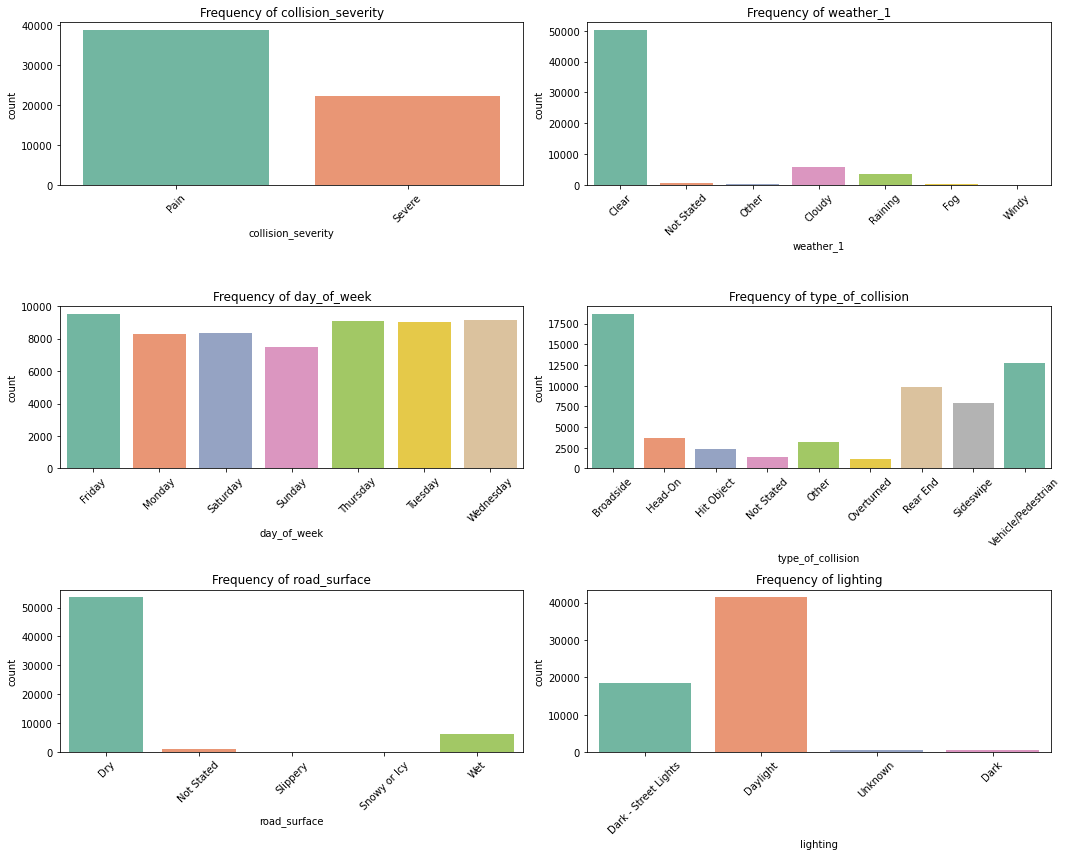

In [24]:
# Bar plot for categorical columns

categorical_columns = ['collision_severity', 'weather_1', 'day_of_week', 'type_of_collision', 'road_surface', 'lighting']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=Crashes_selected[col], palette='Set2')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


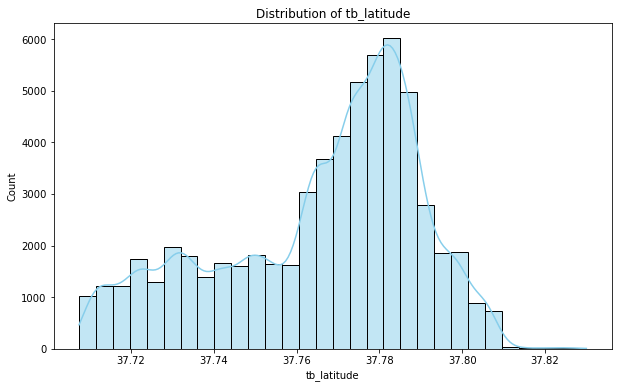

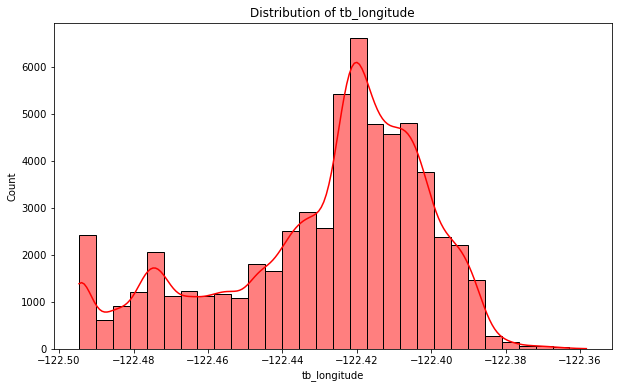

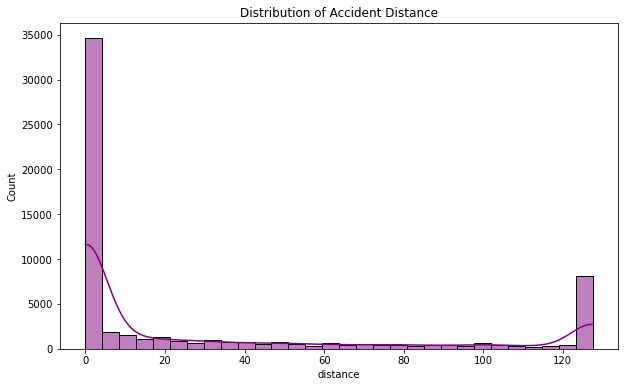

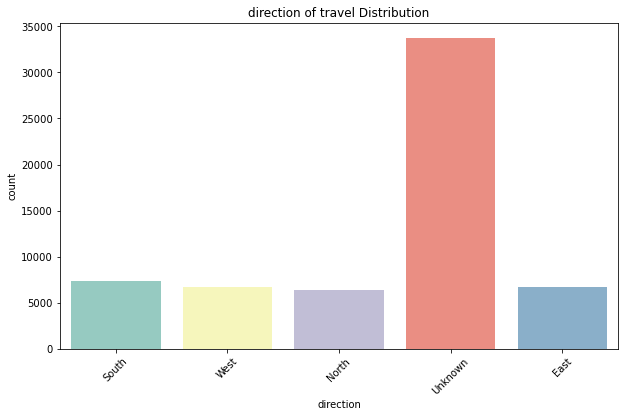

In [25]:
# tb_latitude Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Crashes_selected['tb_latitude'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of tb_latitude')
plt.show()

# tb_longitude Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Crashes_selected['tb_longitude'], kde=True, bins=30, color='red')
plt.title('Distribution of tb_longitude')
plt.show()


# Distance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Crashes_selected['distance'], kde=True, bins=30, color='purple')
plt.title('Distribution of Accident Distance')
plt.show()

# Weather Condition Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='direction', data=Crashes_selected, palette='Set3')
plt.title('direction of travel Distribution')
plt.xticks(rotation=45)
plt.show()


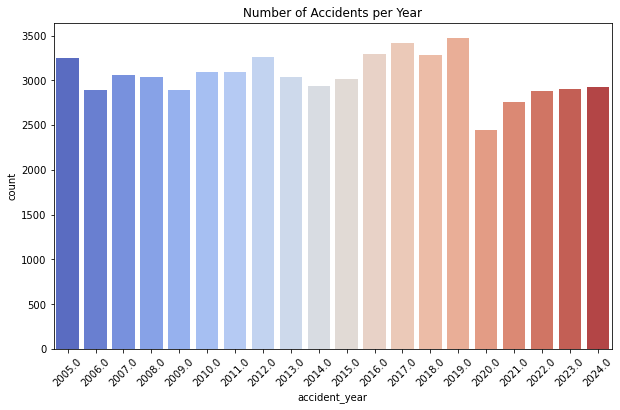

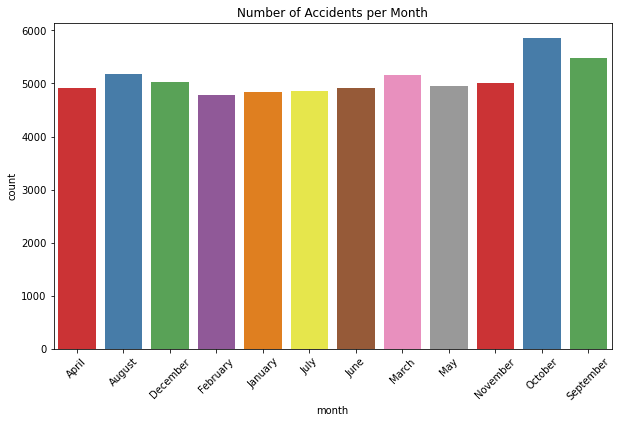

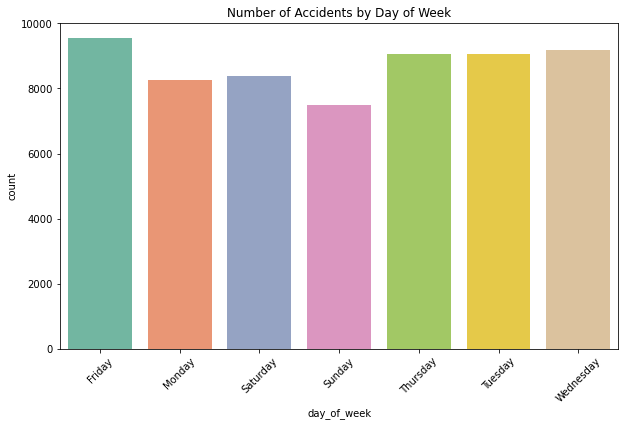

In [26]:
# Distribution of accidents over the year
plt.figure(figsize=(10, 6))
sns.countplot(x=Crashes_selected['accident_year'], palette='coolwarm')
plt.title('Number of Accidents per Year')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x=Crashes_selected['month'], palette='Set1')
plt.title('Number of Accidents per Month')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by day of week
plt.figure(figsize=(10, 6))
sns.countplot(x=Crashes_selected['day_of_week'], palette='Set2')
plt.title('Number of Accidents by Day of Week')
plt.xticks(rotation=45)
plt.show()


### Bivariate distribution

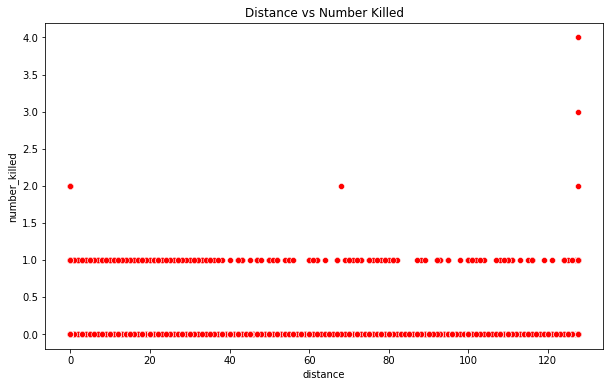

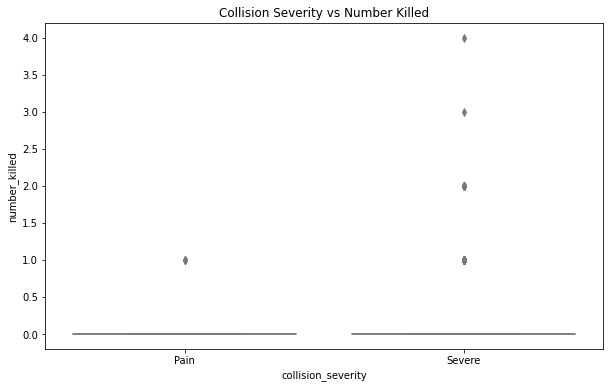

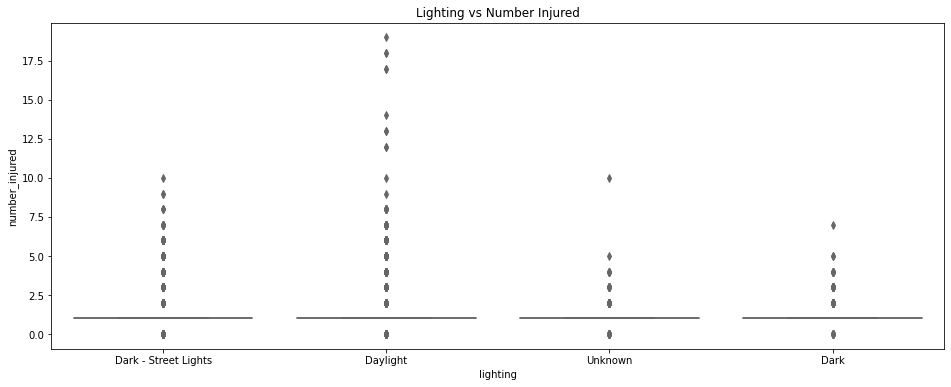

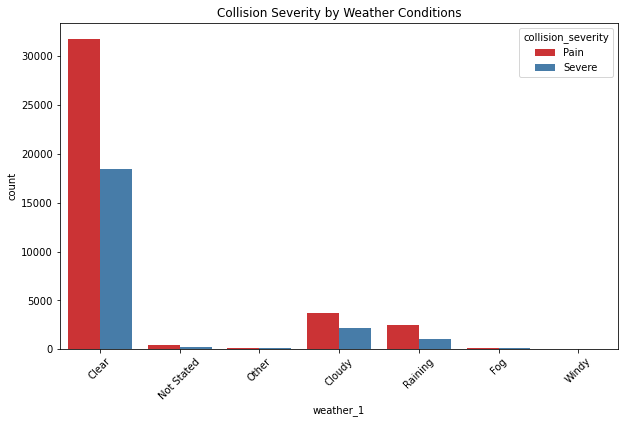

In [27]:
# Distance vs Number Killed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='number_killed', data=Crashes_selected, color='red')
plt.title('Distance vs Number Killed')
plt.show()

# Collision Severity vs Number Killed
plt.figure(figsize=(10, 6))
sns.boxplot(x='collision_severity', y='number_killed', data=Crashes_selected, palette='coolwarm')
plt.title('Collision Severity vs Number Killed')
plt.show()

# Lighting vs Number Injured
plt.figure(figsize=(16, 6))
sns.boxplot(x='lighting', y='number_injured', data=Crashes_selected, palette='coolwarm')
plt.title('Lighting vs Number Injured')
plt.show()

# weather and collision severity
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_1', hue='collision_severity', data=Crashes_selected, palette='Set1')
plt.title('Collision Severity by Weather Conditions')
plt.xticks(rotation=45)
plt.show()


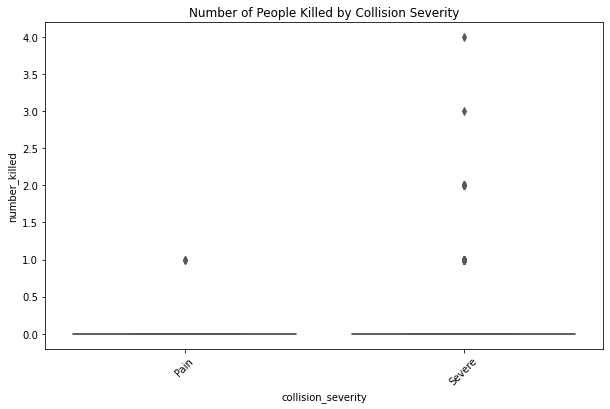

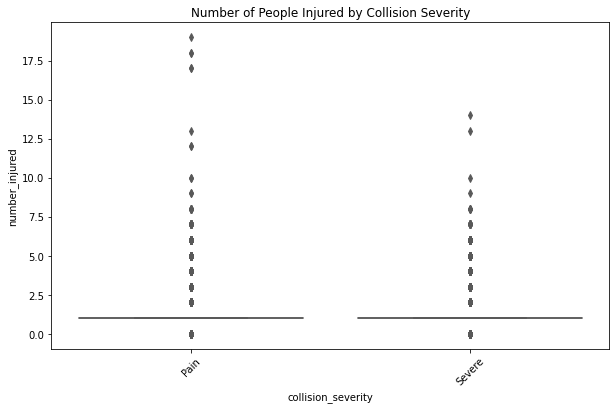

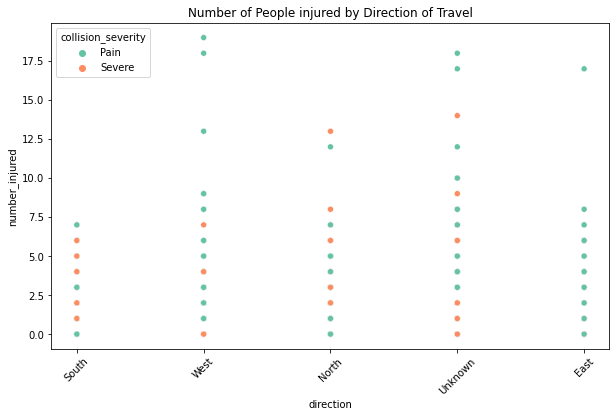

In [28]:
# Box plot for number of killed by collision severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='collision_severity', y='number_killed', data=Crashes_selected, palette='Set2')
plt.title('Number of People Killed by Collision Severity')
plt.xticks(rotation=45)
plt.show()

# Box plot for number of injured by collision severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='collision_severity', y='number_injured', data=Crashes_selected, palette='Set2')
plt.title('Number of People Injured by Collision Severity')
plt.xticks(rotation=45)
plt.show()

# direction and number of people killed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='direction', y='number_injured', data=Crashes_selected, hue='collision_severity', palette='Set2')
plt.title('Number of People injured by Direction of Travel')
plt.xticks(rotation=45)
plt.show()


### Multivariate Analysis

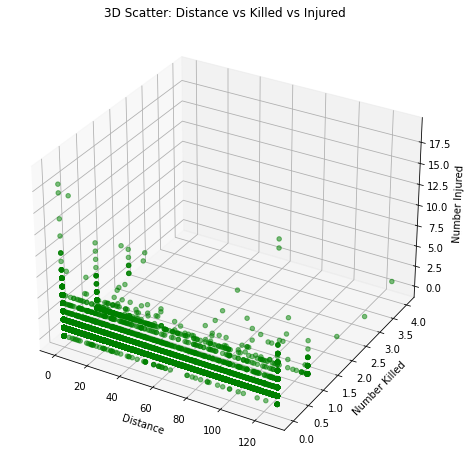

In [29]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Crashes_selected['distance'], Crashes_selected['number_killed'], Crashes_selected['number_injured'], alpha=0.5, color='green')
ax.set_xlabel('Distance')
ax.set_ylabel('Number Killed')
ax.set_zlabel('Number Injured')
plt.title('3D Scatter: Distance vs Killed vs Injured')
plt.show()

In [30]:
Crashes_selected = Crashes_selected.drop(columns = ['tb_latitude','tb_longitude', 'collision_date', 'ped_action','collision_time','accident_year','primary_rd', 'secondary_rd','direction', 'mviw','road_cond_1','dph_col_grp_description','party1_type','party2_type'], axis = 1)


In [31]:
Crashes_selected.columns

Index(['month', 'day_of_week', 'distance', 'weather_1', 'collision_severity',
       'type_of_collision', 'road_surface', 'lighting', 'control_device',
       'number_killed', 'number_injured', 'party_at_fault',
       'party1_dir_of_travel', 'party1_move_pre_acc', 'party2_dir_of_travel',
       'party2_move_pre_acc'],
      dtype='object')

**Modeling**:

In [32]:
# Define the target and features
X = Crashes_selected.drop(columns=['collision_severity'])
y = Crashes_selected['collision_severity']

# Encode target variable using Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This will encode 'fatal', 'severe', 'visible', 'pain' into 0, 1, 2, 3

# Define categorical and numerical columns
categorical_cols = ['weather_1', 'type_of_collision', 'road_surface', 'lighting', 
                    'control_device', 'party_at_fault', 'party1_dir_of_travel', 
                    'party1_move_pre_acc', 'party2_dir_of_travel', 'party2_move_pre_acc', 
                    'month', 'day_of_week',]
numerical_cols = ['distance', 'number_killed', 'number_injured']

# Preprocessing for numerical data: Impute missing values and scale the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Decode the predicted labels back to original target labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Print evaluation metrics
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# 2. Logistic Regression (Multinomial)
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
train_and_evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, "Logistic Regression")

# 3. Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
train_and_evaluate_model(svc_model, X_train, X_test, y_train, y_test, "Support Vector Classifier")

# 4. k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test, "k-Nearest Neighbors")

# 5. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")



Random Forest - Classification Report:
              precision    recall  f1-score   support

        Pain       0.68      0.83      0.75      7764
      Severe       0.51      0.30      0.38      4426

    accuracy                           0.64     12190
   macro avg       0.59      0.57      0.56     12190
weighted avg       0.61      0.64      0.61     12190

Random Forest - Confusion Matrix:
[[6472 1292]
 [3105 1321]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Pain       0.67      0.92      0.78      7764
      Severe       0.61      0.21      0.32      4426

    accuracy                           0.67     12190
   macro avg       0.64      0.57      0.55     12190
weighted avg       0.65      0.67      0.61     12190

Logistic Regression - Confusion Matrix:
[[7168  596]
 [3487  939]]

Support Vector Classifier - Classification Report:
              precision    recall  f1-score   support

        Pain       0.66  

**Key Insights:**

`Fatal accidents:` All models perform well in predicting fatal accidents (high precision and recall). This is likely because fatal accidents are rare but distinct, making them easier to classify.

`Pain accidents:` Most models perform decently on this class, with high recall but moderate precision (especially in Random Forest, Logistic Regression, and SVC).

`Severe and Visible accidents:` All models struggle with these classes, especially Severe, where recall and precision are very low. The low recall for Visible also suggests that the models are misclassifying a large portion of these cases.

`Class imbalance:` Pain accidents dominate the dataset (given their high support), and the models may struggle to differentiate between Severe and Visible accidents due to this imbalance.

**Handling Class Imbalance:**

- SMOTE (Synthetic Minority Over-sampling Technique) or undersampling to balance the class distribution.

**Model Tuning:**

Perform hyperparameter tuning (using GridSearchCV ) to optimize the models and improve performance, especially for the Severe and Visible classes.
Model Ensemble:

**Conclusion:**

XGBoost, Logistic regression and SVC iare the better models overall in terms of accuracy (67%).

XGBoost seems to be the better choice overall, but further improvements can be made by addressing class imbalance and model tuning for the models

**Checking for feature importance**

Before applying Smote and Gridsearch, it is important to reduce the number of columns and this can be achieaved by checking for feature importance

In [33]:

# 1. Extract feature importance for Random Forest and XGBoost
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

# 2. Get the feature names after preprocessing (after one-hot encoding)
categorical_columns = categorical_cols  # List of categorical columns
num_columns = numerical_cols  # List of numerical columns

# Fit the preprocessor to the full dataset (or just the training data)
preprocessor.fit(X, y_encoded)

# Get feature names after one-hot encoding
num_features = num_columns  # Numerical features stay the same
cat_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_columns)

# Combine numerical and categorical feature names
all_feature_names = np.concatenate([num_features, cat_features])

# Ensure feature importance arrays match the number of features
assert len(all_feature_names) == len(rf_importance), "Mismatch in feature lengths for Random Forest"
assert len(all_feature_names) == len(xgb_importance), "Mismatch in feature lengths for XGBoost"

# 3. Combine feature importances into a DataFrame
importance_data = {
    'Feature': all_feature_names,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
}

importance_df = pd.DataFrame(importance_data)

# 4. Sort the feature importances by 'Random Forest' (descending order)
rf_sorted = importance_df.sort_values(by='Random Forest', ascending=False)

# 5. Sort the feature importances by 'XGBoost' (descending order)
xgb_sorted = importance_df.sort_values(by='XGBoost', ascending=False)

# Display the sorted DataFrames
print("\nSorted Feature Importances for Random Forest:")
print(rf_sorted[['Feature', 'Random Forest']])

print("\nSorted Feature Importances for XGBoost:")
print(xgb_sorted[['Feature', 'XGBoost']])



Sorted Feature Importances for Random Forest:
                                               Feature  Random Forest
0                                             distance       0.084190
2                                       number_injured       0.045533
107                              day_of_week_Wednesday       0.022583
105                               day_of_week_Thursday       0.022475
101                                 day_of_week_Friday       0.022294
..                                                 ...            ...
69      party2_move_pre_acc_Crossed Into Opposing Lane       0.000122
70   party2_move_pre_acc_Crossed Into Opposing Lane...       0.000065
78            party2_move_pre_acc_Other Unsafe Turning       0.000063
60         party1_move_pre_acc_Xing into Opposing Lane       0.000006
33                                  party_at_fault_1.0       0.000000

[108 rows x 2 columns]

Sorted Feature Importances for XGBoost:
                                              Fe

**Top 10 features**

In [34]:
# Get the top 10 features for Random Forest
top_rf_features = rf_sorted.head(10)

# Get the top 10 features for XGBoost
top_xgb_features = xgb_sorted.head(10)

# Display the results
print("Top 10 Features for Random Forest:")
print(top_rf_features[['Feature', 'Random Forest']])

print("\nTop 10 Features for XGBoost:")
print(top_xgb_features[['Feature', 'XGBoost']])


Top 10 Features for Random Forest:
                        Feature  Random Forest
0                      distance       0.084190
2                number_injured       0.045533
107       day_of_week_Wednesday       0.022583
105        day_of_week_Thursday       0.022475
101          day_of_week_Friday       0.022294
106         day_of_week_Tuesday       0.021570
102          day_of_week_Monday       0.021188
103        day_of_week_Saturday       0.021007
37   party1_dir_of_travel_South       0.020980
38    party1_dir_of_travel_West       0.020400

Top 10 Features for XGBoost:
                                Feature   XGBoost
16           type_of_collision_Rear End  0.136459
1                         number_killed  0.105839
65         party2_dir_of_travel_Unknown  0.062572
79           party2_move_pre_acc_Parked  0.022000
86  party2_move_pre_acc_Stopped In Road  0.021345
10          type_of_collision_Broadside  0.018822
39          party1_move_pre_acc_Backing  0.017217
85          party2

From the above top 10 most important features, we settled with 'distance', 'number_injured', 'day_of_week', 
                     'party1_dir_of_travel', 'number_killed', 
                     'type_of_collision', 'party2_dir_of_travel' as the feature to continue with for the models

In [38]:
# List of selected features based on importance (including 'day_of_week')
selected_features = ['distance', 'number_injured', 'day_of_week', 
                     'party1_dir_of_travel', 'number_killed', 
                     'type_of_collision', 'party2_dir_of_travel','party2_move_pre_acc','party1_move_pre_acc']

# Update the X dataframe to include only the selected features
X_selected = Crashes_selected[selected_features]

# Update the categorical and numerical columns based on selected features
# 'party1_dir_of_travel' and 'party2_dir_of_travel' are categorical, and 'day_of_week' is also categorical
categorical_cols_selected = ['party1_dir_of_travel', 'party2_dir_of_travel', 'day_of_week','party2_move_pre_acc','party1_move_pre_acc']
numerical_cols_selected = ['distance', 'number_injured', 'number_killed']

# Preprocessing for numerical data: Impute missing values and scale the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_selected),
        ('cat', categorical_transformer, categorical_cols_selected)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Decode the predicted labels back to original target labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Print evaluation metrics
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))

# 1. Logistic Regression Classifier
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
train_and_evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, "Logistic Regression")


# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")



Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Pain       0.66      0.94      0.78      7764
      Severe       0.61      0.17      0.26      4426

    accuracy                           0.66     12190
   macro avg       0.64      0.55      0.52     12190
weighted avg       0.65      0.66      0.59     12190

Logistic Regression - Confusion Matrix:
[[7296  468]
 [3687  739]]
[17:37:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



XGBoost - Classification Report:
              precision    recall  f1-score   support

        Pain       0.67      0.91      0.77      7764
      Severe       0.5

In [39]:
# List of selected features based on importance (including 'day_of_week')
selected_features = ['distance', 'number_injured', 'day_of_week', 
                     'party1_dir_of_travel', 'number_killed', 
                     'type_of_collision', 'party2_dir_of_travel']
# Update the X dataframe to include only the selected features
X_selected = Crashes_selected[selected_features]

# Update the categorical and numerical columns based on selected features
categorical_cols_selected = ['party1_dir_of_travel', 'party2_dir_of_travel', 'day_of_week']
numerical_cols_selected = ['distance', 'number_injured', 'number_killed']

# Preprocessing for numerical data: Impute missing values and scale the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_selected),
        ('cat', categorical_transformer, categorical_cols_selected)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, param_grid):
    

    # Create and evaluate the pipeline with SMOTE and GridSearchCV
    clf = imbaPipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

    # Perform GridSearchCV with limited parameters to avoid memory overload
    grid_search = GridSearchCV(clf, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='accuracy')

    # Train the model with GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Decode the predicted labels back to original target labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Print evaluation metrics
    print(f"\n{model_name} - Best Parameters from GridSearchCV: {grid_search.best_params_}")
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))

# 1. Logistic Regression Model
log_reg_model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000, random_state=42)

# GridSearchCV parameter grid for Logistic Regression (keeping it simple)
log_reg_param_grid = {
    'model__C': [0.01, 0.1, 1],  # Regularization strength
    'model__max_iter': [500, 1000],  # Iterations limit
    'model__solver': ['lbfgs', 'liblinear']  # Solvers to try
}

train_and_evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, "Logistic Regression", log_reg_param_grid)

# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# GridSearchCV parameter grid for XGBoost (keeping it simple)
xgb_param_grid = {
    'model__max_depth': [3, 6],         # max depth
    'model__learning_rate': [0.01, 0.1], # Learning rates
    'model__n_estimators': [50, 100],  # estimators for efficiency
    'model__subsample': [0.8, 1.0]     # Lsubsample to avoid overfitting
}


train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost", xgb_param_grid)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   22.7s finished



Logistic Regression - Best Parameters from GridSearchCV: {'model__C': 1, 'model__max_iter': 500, 'model__solver': 'lbfgs'}

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Pain       0.67      0.79      0.73      7764
      Severe       0.46      0.32      0.38      4426

    accuracy                           0.62     12190
   macro avg       0.57      0.55      0.55     12190
weighted avg       0.60      0.62      0.60     12190

Logistic Regression - Confusion Matrix:
[[6153 1611]
 [3031 1395]]
Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  1.1min finished


[17:40:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



XGBoost - Best Parameters from GridSearchCV: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8}

XGBoost - Classification Report:
              precision    recall  f1-score   support

        Pain       0.66      0.95      0.78      7764
      Severe       0.64      0.14      0.23      4426

    accuracy                           0.66     12190
   macro avg       0.65      0.55      0.51     12190
weighted avg       0.65      0.66      0.58     12190

XGBoost - Confusion Matrix:
[[7408  356]
 [3800  626]]
